In [ ]:
import numpy as np
from scipy import stats

# Данные коэффициента сжатия (в % от исходного размера)
data = [63.2, 64.1, 62.8, 65.0, 63.9, 64.7, 62.5, 63.3, 64.0, 63.6, 
        62.9, 64.2, 63.1, 63.8, 64.5, 62.7, 63.4, 64.3, 63.0, 64.6]

# Преобразуем в массив numpy
data_array = np.array(data)

# Параметры гипотезы
mu0 = 65  # эталонное значение (65%)
alpha = 0.05  # уровень значимости

# Рассчитаем основные статистики
n = len(data_array)  # количество наблюдений
mean = np.mean(data_array)  # среднее значение
std = np.std(data_array, ddof=1)  # стандартное отклонение (с поправкой)
se = std / np.sqrt(n)  # стандартная ошибка среднего

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"Количество наблюдений: n = {n}")
print(f"Среднее значение: x̄ = {mean:.3f}%")
print(f"Стандартное отклонение: s = {std:.3f}%")
print(f"Стандартная ошибка: SE = {se:.3f}%")
print(f"Эталонное значение: μ₀ = {mu0}%")

# Проведем одновыборочный t-тест
t_statistic = (mean - mu0) / se
df = n - 1  # степени свободы

# Расчет p-value для левостороннего теста (H1: μ < μ₀)
p_value = stats.t.cdf(t_statistic, df)

print("\n=== РЕЗУЛЬТАТЫ T-ТЕСТА ===")
print(f"t-статистика: t = {t_statistic:.4f}")
print(f"Степени свободы: df = {df}")
print(f"p-value: p = {p_value:.6f}")

# Проверка гипотезы
print("\n=== ПРОВЕРКА ГИПОТЕЗЫ ===")
print(f"Уровень значимости: α = {alpha}")

if p_value < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Алгоритм сжимает данные ЛУЧШЕ эталонного (p < 0.05)")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет оснований считать, что алгоритм сжимает лучше эталонного")

# Дополнительно: доверительный интервал
conf_interval = stats.t.interval(0.95, df, loc=mean, scale=se)
print(f"\n95% доверительный интервал: ({conf_interval[0]:.3f}%, {conf_interval[1]:.3f}%)")

# Визуализация относительно эталонного значения
print(f"\nРазница с эталоном: {mean - mu0:.3f}%")
if mean < mu0:
    print("Наблюдаемое среднее НИЖЕ эталонного")
else:
    print("Наблюдаемое среднее ВЫШЕ эталонного")

=== ОСНОВНЫЕ СТАТИСТИКИ ===
Версия 1 (n=15):
  Среднее: 119.93 мс
  Стандартное отклонение: 2.91 мс
  Стандартная ошибка: 0.75 мс

Версия 2 (n=15):
  Среднее: 129.40 мс
  Стандартное отклонение: 2.10 мс
  Стандартная ошибка: 0.54 мс

=== ПРОВЕРКА НОРМАЛЬНОСТИ (Шапиро-Уилк) ===
Версия 1: p-value = 0.9785 (нормальное)
Версия 2: p-value = 0.7102 (нормальное)

=== ПАРНЫЙ T-ТЕСТ ===
Гипотезы:
H₀: Средние времени выполнения РАВНЫ (μ1 = μ2)
H₁: Средние времени выполнения РАЗЛИЧАЮТСЯ (μ1 ≠ μ2)

Результаты:
t-статистика: -17.7500
p-value: 0.000000
РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу
ВЫВОД: Есть статистически значимая разница между версиями

=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ===
Разница средних: -9.47 мс (v1 - v2)
Версия 1 работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ версии 2
95% доверительный интервал для разницы: (-10.61, -8.32) мс

=== НЕЗАВИСИМЫЙ T-ТЕСТ (для сравнения) ===
t-статистика: -10.2101
p-value: 0.000000


/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_37140/2813861077.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([v1, v2], labels=['v1', 'v2'])


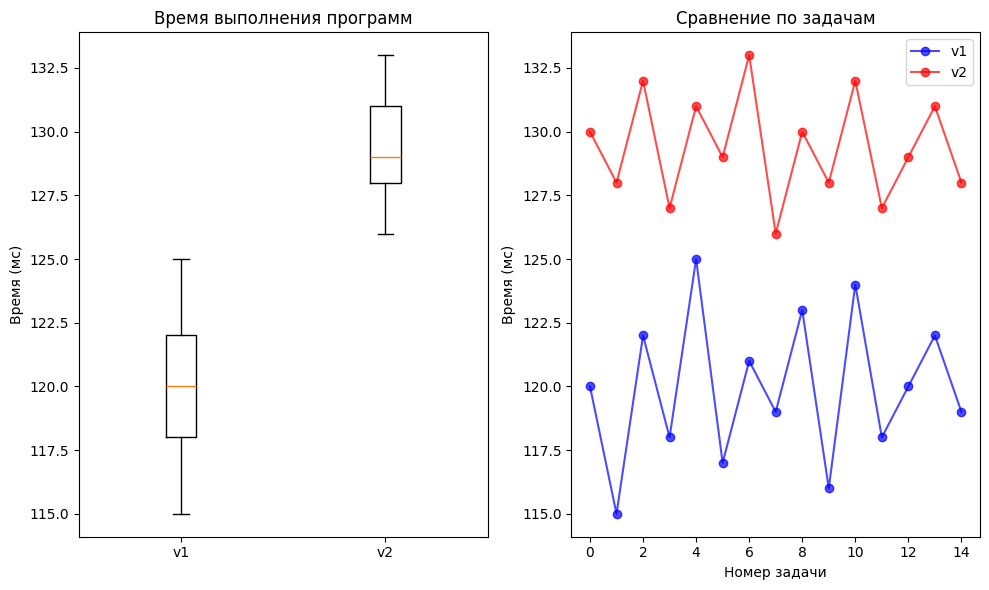

In [ ]:
import numpy as np
from scipy import stats

# Данные времени выполнения (в мс)
v1_times = [120, 115, 122, 118, 125, 117, 121, 119, 123, 116, 124, 118, 120, 122, 119]
v2_times = [130, 128, 132, 127, 131, 129, 133, 126, 130, 128, 132, 127, 129, 131, 128]

# Преобразуем в массивы numpy
v1 = np.array(v1_times)
v2 = np.array(v2_times)

# Уровень значимости
alpha = 0.05

# Рассчитаем основные статистики для каждой версии
print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"Версия 1 (n={len(v1)}):")
print(f"  Среднее: {np.mean(v1):.2f} мс")
print(f"  Стандартное отклонение: {np.std(v1, ddof=1):.2f} мс")
print(f"  Стандартная ошибка: {np.std(v1, ddof=1)/np.sqrt(len(v1)):.2f} мс")

print(f"\nВерсия 2 (n={len(v2)}):")
print(f"  Среднее: {np.mean(v2):.2f} мс")
print(f"  Стандартное отклонение: {np.std(v2, ddof=1):.2f} мс")
print(f"  Стандартная ошибка: {np.std(v2, ddof=1)/np.sqrt(len(v2)):.2f} мс")

# Проверим на нормальность (необязательно, но полезно для t-теста)
from scipy.stats import shapiro
_, p_v1 = shapiro(v1)
_, p_v2 = shapiro(v2)

print(f"\n=== ПРОВЕРКА НОРМАЛЬНОСТИ (Шапиро-Уилк) ===")
print(f"Версия 1: p-value = {p_v1:.4f} {'(нормальное)' if p_v1 > 0.05 else '(не нормальное)'}")
print(f"Версия 2: p-value = {p_v2:.4f} {'(нормальное)' if p_v2 > 0.05 else '(не нормальное)'}")

# Проведем парный t-тест (так как измерения на одинаковых задачах)
t_stat, p_value = stats.ttest_rel(v1, v2)  # парный тест

print("\n=== ПАРНЫЙ T-ТЕСТ ===")
print("Гипотезы:")
print("H₀: Средние времени выполнения РАВНЫ (μ1 = μ2)")
print("H₁: Средние времени выполнения РАЗЛИЧАЮТСЯ (μ1 ≠ μ2)")
print(f"\nРезультаты:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Двусторонний тест
if p_value < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Есть статистически значимая разница между версиями")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет статистически значимой разницы между версиями")

# Дополнительно: проверим, какая версия быстрее
mean_diff = np.mean(v1) - np.mean(v2)
print(f"\n=== ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ ===")
print(f"Разница средних: {mean_diff:.2f} мс (v1 - v2)")

if p_value < alpha:
    if mean_diff < 0:
        print("Версия 1 работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ версии 2")
    else:
        print("Версия 2 работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ версии 1")
else:
    print("Разница не является статистически значимой")

# Доверительный интервал для разницы средних
diff = v1 - v2
se_diff = np.std(diff, ddof=1) / np.sqrt(len(diff))
ci_low = mean_diff - stats.t.ppf(0.975, len(diff)-1) * se_diff
ci_high = mean_diff + stats.t.ppf(0.975, len(diff)-1) * se_diff

print(f"95% доверительный интервал для разницы: ({ci_low:.2f}, {ci_high:.2f}) мс")

# Альтернатива: независимый t-тест (если бы задачи были разные)
print("\n=== НЕЗАВИСИМЫЙ T-ТЕСТ (для сравнения) ===")
t_ind, p_ind = stats.ttest_ind(v1, v2)
print(f"t-статистика: {t_ind:.4f}")
print(f"p-value: {p_ind:.6f}")

# Визуализация данных
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot([v1, v2], labels=['v1', 'v2'])
plt.title('Время выполнения программ')
plt.ylabel('Время (мс)')

plt.subplot(1, 2, 2)
plt.plot(range(len(v1)), v1, 'bo-', label='v1', alpha=0.7)
plt.plot(range(len(v2)), v2, 'ro-', label='v2', alpha=0.7)
plt.title('Сравнение по задачам')
plt.xlabel('Номер задачи')
plt.ylabel('Время (мс)')
plt.legend()

plt.tight_layout()
plt.show()

=== ОСНОВНЫЕ СТАТИСТИКИ ===
K-means (n=12):
  Среднее ARI: 0.7125
  Стандартное отклонение: 0.0242
DBSCAN (n=15):
  Среднее ARI: 0.6400
  Стандартное отклонение: 0.0267

=== ПРОВЕРКА НОРМАЛЬНОСТИ ===
K-means: p-value = 0.9512
DBSCAN: p-value = 0.7759
Тест Левена на равенство дисперсий: p-value = 0.7031

=== НЕЗАВИСИМЫЙ T-ТЕСТ ===
H₀: Среднее качество K-means = Среднее качество DBSCAN
H₁: Среднее качество K-means ≠ Среднее качество DBSCAN
t-статистика: 7.3031
p-value: 0.000000
РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу
ВЫВОД: Есть статистически значимая разница в качестве

Разница средних: 0.0725 (K-means - DBSCAN)
K-means показывает ЗНАЧИТЕЛЬНО ЛУЧШЕЕ качество
95% доверительный интервал для разницы: (0.0523, 0.0927)


/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_37140/501849299.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([kmeans, dbscan], labels=['K-means', 'DBSCAN'])


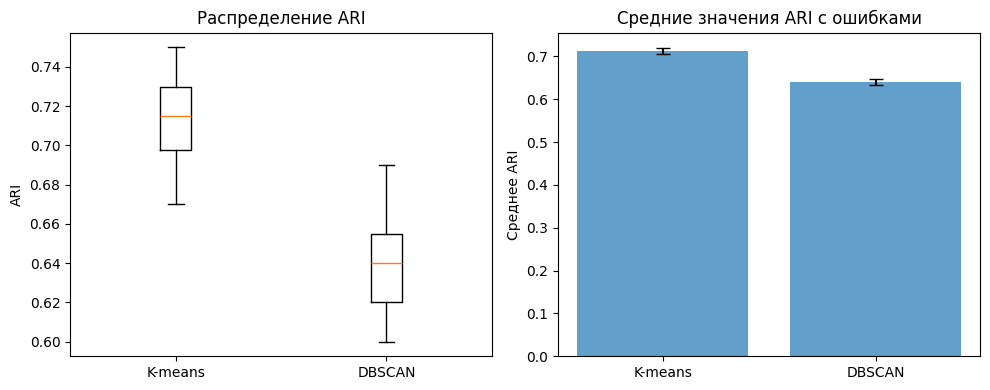


Размер эффекта (Коэн d): 2.8455
Очень большой размер эффекта


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

kmeans_ari = [0.72, 0.68, 0.75, 0.71, 0.73, 0.69, 0.74, 0.70, 0.72, 0.71, 0.73, 0.67]
dbscan_ari = [0.65, 0.63, 0.69, 0.61, 0.67, 0.64, 0.68, 0.62, 0.66, 0.60, 0.65, 0.63, 0.64, 0.62, 0.61]

kmeans = np.array(kmeans_ari)
dbscan = np.array(dbscan_ari)

alpha = 0.05

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"K-means (n={len(kmeans)}):")
print(f"  Среднее ARI: {np.mean(kmeans):.4f}")
print(f"  Стандартное отклонение: {np.std(kmeans, ddof=1):.4f}")

print(f"DBSCAN (n={len(dbscan)}):")
print(f"  Среднее ARI: {np.mean(dbscan):.4f}")
print(f"  Стандартное отклонение: {np.std(dbscan, ddof=1):.4f}")

_, p_kmeans = stats.shapiro(kmeans)
_, p_dbscan = stats.shapiro(dbscan)

print(f"\n=== ПРОВЕРКА НОРМАЛЬНОСТИ ===")
print(f"K-means: p-value = {p_kmeans:.4f}")
print(f"DBSCAN: p-value = {p_dbscan:.4f}")

levene_stat, levene_p = stats.levene(kmeans, dbscan)
print(f"Тест Левена на равенство дисперсий: p-value = {levene_p:.4f}")

t_stat, p_value = stats.ttest_ind(kmeans, dbscan, equal_var=levene_p > 0.05)

print("\n=== НЕЗАВИСИМЫЙ T-ТЕСТ ===")
print("H₀: Среднее качество K-means = Среднее качество DBSCAN")
print("H₁: Среднее качество K-means ≠ Среднее качество DBSCAN")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Есть статистически значимая разница в качестве")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет статистически значимой разницы в качестве")

mean_diff = np.mean(kmeans) - np.mean(dbscan)
print(f"\nРазница средних: {mean_diff:.4f} (K-means - DBSCAN)")

if p_value < alpha:
    if mean_diff > 0:
        print("K-means показывает ЗНАЧИТЕЛЬНО ЛУЧШЕЕ качество")
    else:
        print("DBSCAN показывает ЗНАЧИТЕЛЬНО ЛУЧШЕЕ качество")

n1, n2 = len(kmeans), len(dbscan)
std1, std2 = np.std(kmeans, ddof=1), np.std(dbscan, ddof=1)
se_diff = np.sqrt(std1**2/n1 + std2**2/n2)
df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))

t_critical = stats.t.ppf(0.975, df)
ci_low = mean_diff - t_critical * se_diff
ci_high = mean_diff + t_critical * se_diff

print(f"95% доверительный интервал для разницы: ({ci_low:.4f}, {ci_high:.4f})")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.boxplot([kmeans, dbscan], labels=['K-means', 'DBSCAN'])
plt.title('Распределение ARI')
plt.ylabel('ARI')

plt.subplot(1, 2, 2)
plt.bar(['K-means', 'DBSCAN'], [np.mean(kmeans), np.mean(dbscan)], 
        yerr=[np.std(kmeans, ddof=1)/np.sqrt(len(kmeans)), np.std(dbscan, ddof=1)/np.sqrt(len(dbscan))], 
        capsize=5, alpha=0.7)
plt.title('Средние значения ARI с ошибками')
plt.ylabel('Среднее ARI')

plt.tight_layout()
plt.show()

effect_size = mean_diff / np.sqrt((std1**2 + std2**2)/2)
print(f"\nРазмер эффекта (Коэн d): {effect_size:.4f}")

if abs(effect_size) < 0.2:
    print("Маленький размер эффекта")
elif abs(effect_size) < 0.5:
    print("Средний размер эффекта")
elif abs(effect_size) < 0.8:
    print("Большой размер эффекта")
else:
    print("Очень большой размер эффекта")

=== ОСНОВНЫЕ СТАТИСТИКИ ===
До оптимизации (n=15):
  Среднее время: 206.87 мс
  Стандартное отклонение: 7.03 мс
После оптимизации (n=15):
  Среднее время: 183.33 мс
  Стандартное отклонение: 5.74 мс

Разности (до - после):
  Средняя разность: 23.53 мс
  Стандартное отклонение разностей: 2.20 мс

=== ПРОВЕРКА НОРМАЛЬНОСТИ ===
До оптимизации: p-value = 0.9922
После оптимизации: p-value = 0.8996
Разности: p-value = 0.0054

=== ПАРНЫЙ T-ТЕСТ ===
H₀: Время до оптимизации = Время после оптимизации
H₁: Время до оптимизации > Время после оптимизации
t-статистика: 41.4373
p-value (двусторонний): 0.000000
p-value (односторонний): 0.000000
РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу
ВЫВОД: Время выполнения УМЕНЬШИЛОСЬ после оптимизации

Среднее улучшение: 23.53 мс
Улучшение производительности: 11.4%
95% доверительный интервал для улучшения: (22.32, 24.75) мс


/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_37140/629898388.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['До', 'После'])


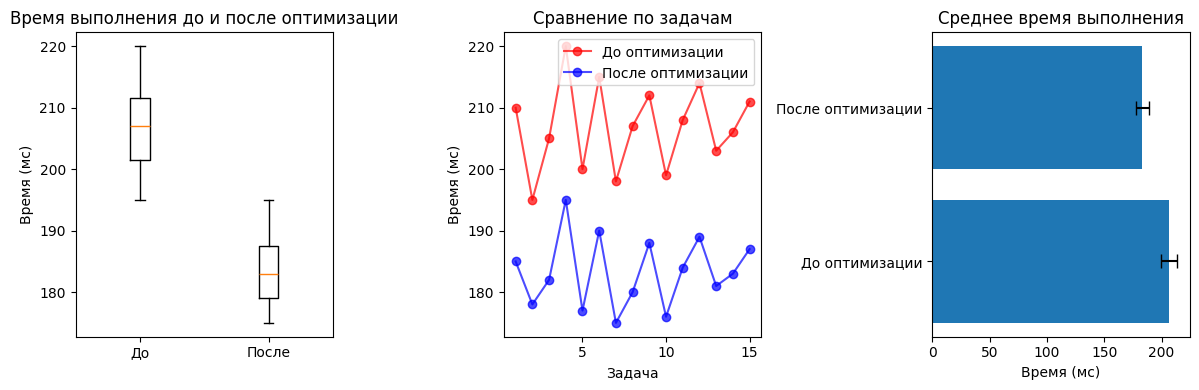


Размер эффекта (Коэн d): 10.6991
Очень большой размер эффекта

Минимальное улучшение: 17 мс
Максимальное улучшение: 27 мс


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

before_opt = [210, 195, 205, 220, 200, 215, 198, 207, 212, 199, 208, 214, 203, 206, 211]
after_opt = [185, 178, 182, 195, 177, 190, 175, 180, 188, 176, 184, 189, 181, 183, 187]

before = np.array(before_opt)
after = np.array(after_opt)

alpha = 0.05

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"До оптимизации (n={len(before)}):")
print(f"  Среднее время: {np.mean(before):.2f} мс")
print(f"  Стандартное отклонение: {np.std(before, ddof=1):.2f} мс")

print(f"После оптимизации (n={len(after)}):")
print(f"  Среднее время: {np.mean(after):.2f} мс")
print(f"  Стандартное отклонение: {np.std(after, ddof=1):.2f} мс")

diff = before - after
print(f"\nРазности (до - после):")
print(f"  Средняя разность: {np.mean(diff):.2f} мс")
print(f"  Стандартное отклонение разностей: {np.std(diff, ddof=1):.2f} мс")

_, p_before = stats.shapiro(before)
_, p_after = stats.shapiro(after)
_, p_diff = stats.shapiro(diff)

print(f"\n=== ПРОВЕРКА НОРМАЛЬНОСТИ ===")
print(f"До оптимизации: p-value = {p_before:.4f}")
print(f"После оптимизации: p-value = {p_after:.4f}")
print(f"Разности: p-value = {p_diff:.4f}")

t_stat, p_value = stats.ttest_rel(before, after)

print("\n=== ПАРНЫЙ T-ТЕСТ ===")
print("H₀: Время до оптимизации = Время после оптимизации")
print("H₁: Время до оптимизации > Время после оптимизации")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value (двусторонний): {p_value:.6f}")

p_value_one_tailed = p_value / 2

print(f"p-value (односторонний): {p_value_one_tailed:.6f}")

if p_value_one_tailed < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Время выполнения УМЕНЬШИЛОСЬ после оптимизации")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет статистически значимого уменьшения времени")

mean_improvement = np.mean(diff)
print(f"\nСреднее улучшение: {mean_improvement:.2f} мс")

improvement_percent = (mean_improvement / np.mean(before)) * 100
print(f"Улучшение производительности: {improvement_percent:.1f}%")

se_diff = np.std(diff, ddof=1) / np.sqrt(len(diff))
df = len(diff) - 1
t_critical = stats.t.ppf(0.975, df)
ci_low = mean_improvement - t_critical * se_diff
ci_high = mean_improvement + t_critical * se_diff

print(f"95% доверительный интервал для улучшения: ({ci_low:.2f}, {ci_high:.2f}) мс")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot([before, after], labels=['До', 'После'])
plt.title('Время выполнения до и после оптимизации')
plt.ylabel('Время (мс)')

plt.subplot(1, 3, 2)
x = range(1, len(before) + 1)
plt.plot(x, before, 'ro-', label='До оптимизации', alpha=0.7)
plt.plot(x, after, 'bo-', label='После оптимизации', alpha=0.7)
plt.xlabel('Задача')
plt.ylabel('Время (мс)')
plt.title('Сравнение по задачам')
plt.legend()

plt.subplot(1, 3, 3)
plt.barh(['До оптимизации', 'После оптимизации'], [np.mean(before), np.mean(after)], 
         xerr=[np.std(before, ddof=1), np.std(after, ddof=1)], capsize=5)
plt.title('Среднее время выполнения')
plt.xlabel('Время (мс)')

plt.tight_layout()
plt.show()

effect_size = mean_improvement / np.std(diff, ddof=1)
print(f"\nРазмер эффекта (Коэн d): {effect_size:.4f}")

if effect_size < 0.2:
    print("Маленький размер эффекта")
elif effect_size < 0.5:
    print("Средний размер эффекта")
elif effect_size < 0.8:
    print("Большой размер эффекта")
else:
    print("Очень большой размер эффекта")

min_improvement = min(diff)
max_improvement = max(diff)
print(f"\nМинимальное улучшение: {min_improvement} мс")
print(f"Максимальное улучшение: {max_improvement} мс")

=== ОСНОВНЫЕ СТАТИСТИКИ ===
L1-кэш (n=20):
  Средняя задержка: 45.55 мс
  Стандартное отклонение: 1.50 мс
L2-кэш (n=20):
  Средняя задержка: 53.55 мс
  Стандартное отклонение: 2.26 мс

Разности (L1 - L2):
  Средняя разность: -8.00 мс
  Стандартное отклонение разностей: 0.97 мс

=== ПРОВЕРКА НОРМАЛЬНОСТИ ===
L1-кэш: p-value = 0.2930
L2-кэш: p-value = 0.7557
Разности: p-value = 0.0027

=== ПАРНЫЙ T-ТЕСТ ===
H₀: Средняя задержка L1 = Средняя задержка L2
H₁: Средняя задержка L1 ≠ Средняя задержка L2
t-статистика: -36.7575
p-value: 0.000000
РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу
ВЫВОД: Есть статистически значимая разница между типами кэширования

Средняя разница: -8.00 мс (L1 - L2)
L1-кэш работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ L2-кэша
95% доверительный интервал для разницы: (-8.46, -7.54) мс


/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_37140/183640239.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([l1, l2], labels=['L1', 'L2'])


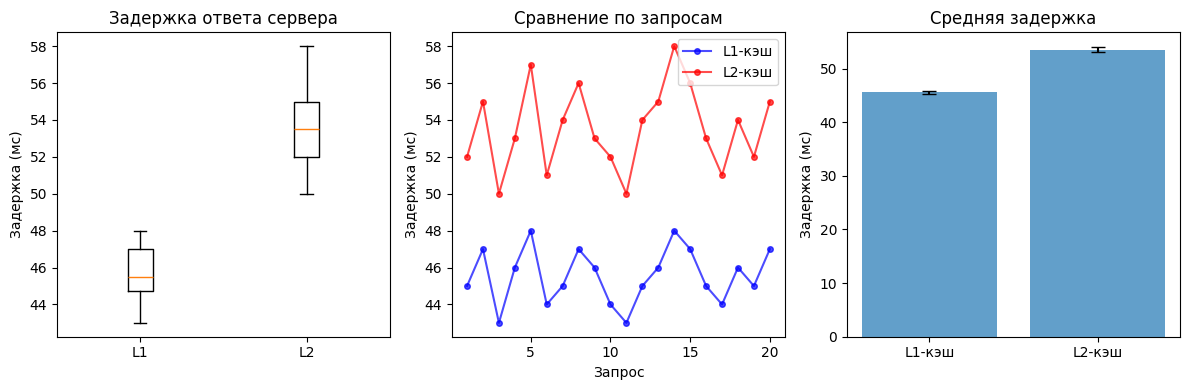


Размер эффекта (Коэн d): 8.2192
Очень большой размер эффекта
L1-кэш быстрее L2-кэша на 14.9%


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

l1_latency = [45, 47, 43, 46, 48, 44, 45, 47, 46, 44, 43, 45, 46, 48, 47, 45, 44, 46, 45, 47]
l2_latency = [52, 55, 50, 53, 57, 51, 54, 56, 53, 52, 50, 54, 55, 58, 56, 53, 51, 54, 52, 55]

l1 = np.array(l1_latency)
l2 = np.array(l2_latency)

alpha = 0.05

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"L1-кэш (n={len(l1)}):")
print(f"  Средняя задержка: {np.mean(l1):.2f} мс")
print(f"  Стандартное отклонение: {np.std(l1, ddof=1):.2f} мс")

print(f"L2-кэш (n={len(l2)}):")
print(f"  Средняя задержка: {np.mean(l2):.2f} мс")
print(f"  Стандартное отклонение: {np.std(l2, ddof=1):.2f} мс")

diff = l1 - l2
print(f"\nРазности (L1 - L2):")
print(f"  Средняя разность: {np.mean(diff):.2f} мс")
print(f"  Стандартное отклонение разностей: {np.std(diff, ddof=1):.2f} мс")

_, p_l1 = stats.shapiro(l1)
_, p_l2 = stats.shapiro(l2)
_, p_diff = stats.shapiro(diff)

print(f"\n=== ПРОВЕРКА НОРМАЛЬНОСТИ ===")
print(f"L1-кэш: p-value = {p_l1:.4f}")
print(f"L2-кэш: p-value = {p_l2:.4f}")
print(f"Разности: p-value = {p_diff:.4f}")

t_stat, p_value = stats.ttest_rel(l1, l2)

print("\n=== ПАРНЫЙ T-ТЕСТ ===")
print("H₀: Средняя задержка L1 = Средняя задержка L2")
print("H₁: Средняя задержка L1 ≠ Средняя задержка L2")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Есть статистически значимая разница между типами кэширования")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет статистически значимой разницы между типами кэширования")

mean_diff = np.mean(diff)
print(f"\nСредняя разница: {mean_diff:.2f} мс (L1 - L2)")

if p_value < alpha:
    if mean_diff < 0:
        print("L1-кэш работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ L2-кэша")
    else:
        print("L2-кэш работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ L1-кэша")

se_diff = np.std(diff, ddof=1) / np.sqrt(len(diff))
df = len(diff) - 1
t_critical = stats.t.ppf(0.975, df)
ci_low = mean_diff - t_critical * se_diff
ci_high = mean_diff + t_critical * se_diff

print(f"95% доверительный интервал для разницы: ({ci_low:.2f}, {ci_high:.2f}) мс")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot([l1, l2], labels=['L1', 'L2'])
plt.title('Задержка ответа сервера')
plt.ylabel('Задержка (мс)')

plt.subplot(1, 3, 2)
x = range(1, len(l1) + 1)
plt.plot(x, l1, 'bo-', label='L1-кэш', alpha=0.7, markersize=4)
plt.plot(x, l2, 'ro-', label='L2-кэш', alpha=0.7, markersize=4)
plt.xlabel('Запрос')
plt.ylabel('Задержка (мс)')
plt.title('Сравнение по запросам')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(['L1-кэш', 'L2-кэш'], [np.mean(l1), np.mean(l2)], 
        yerr=[np.std(l1, ddof=1)/np.sqrt(len(l1)), np.std(l2, ddof=1)/np.sqrt(len(l2))], 
        capsize=5, alpha=0.7)
plt.title('Средняя задержка')
plt.ylabel('Задержка (мс)')

plt.tight_layout()
plt.show()

effect_size = abs(mean_diff) / np.std(diff, ddof=1)
print(f"\nРазмер эффекта (Коэн d): {effect_size:.4f}")

if effect_size < 0.2:
    print("Маленький размер эффекта")
elif effect_size < 0.5:
    print("Средний размер эффекта")
elif effect_size < 0.8:
    print("Большой размер эффекта")
else:
    print("Очень большой размер эффекта")

faster_percent = (abs(mean_diff) / np.mean(l2)) * 100
print(f"L1-кэш быстрее L2-кэша на {faster_percent:.1f}%")

=== ОСНОВНЫЕ СТАТИСТИКИ ===
L1-кэш (n=20):
  Средняя задержка: 45.55 мс
  Стандартное отклонение: 1.50 мс
L2-кэш (n=20):
  Средняя задержка: 53.55 мс
  Стандартное отклонение: 2.26 мс

Разности (L1 - L2):
  Средняя разность: -8.00 мс
  Стандартное отклонение разностей: 0.97 мс

=== ПРОВЕРКА НОРМАЛЬНОСТИ ===
L1-кэш: p-value = 0.2930
L2-кэш: p-value = 0.7557
Разности: p-value = 0.0027

=== ПАРНЫЙ T-ТЕСТ ===
H₀: Средняя задержка L1 = Средняя задержка L2
H₁: Средняя задержка L1 ≠ Средняя задержка L2
t-статистика: -36.7575
p-value: 0.000000
РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу
ВЫВОД: Есть статистически значимая разница между типами кэширования

Средняя разница: -8.00 мс (L1 - L2)
L1-кэш работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ L2-кэша
95% доверительный интервал для разницы: (-8.46, -7.54) мс


/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_37140/183640239.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([l1, l2], labels=['L1', 'L2'])


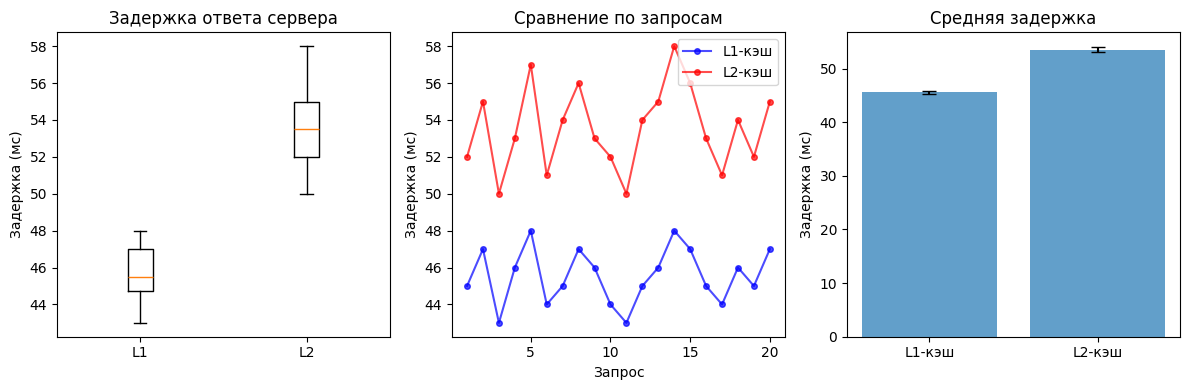


Размер эффекта (Коэн d): 8.2192
Очень большой размер эффекта
L1-кэш быстрее L2-кэша на 14.9%


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

l1_latency = [45, 47, 43, 46, 48, 44, 45, 47, 46, 44, 43, 45, 46, 48, 47, 45, 44, 46, 45, 47]
l2_latency = [52, 55, 50, 53, 57, 51, 54, 56, 53, 52, 50, 54, 55, 58, 56, 53, 51, 54, 52, 55]

l1 = np.array(l1_latency)
l2 = np.array(l2_latency)

alpha = 0.05

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"L1-кэш (n={len(l1)}):")
print(f"  Средняя задержка: {np.mean(l1):.2f} мс")
print(f"  Стандартное отклонение: {np.std(l1, ddof=1):.2f} мс")

print(f"L2-кэш (n={len(l2)}):")
print(f"  Средняя задержка: {np.mean(l2):.2f} мс")
print(f"  Стандартное отклонение: {np.std(l2, ddof=1):.2f} мс")

diff = l1 - l2
print(f"\nРазности (L1 - L2):")
print(f"  Средняя разность: {np.mean(diff):.2f} мс")
print(f"  Стандартное отклонение разностей: {np.std(diff, ddof=1):.2f} мс")

_, p_l1 = stats.shapiro(l1)
_, p_l2 = stats.shapiro(l2)
_, p_diff = stats.shapiro(diff)

print(f"\n=== ПРОВЕРКА НОРМАЛЬНОСТИ ===")
print(f"L1-кэш: p-value = {p_l1:.4f}")
print(f"L2-кэш: p-value = {p_l2:.4f}")
print(f"Разности: p-value = {p_diff:.4f}")

t_stat, p_value = stats.ttest_rel(l1, l2)

print("\n=== ПАРНЫЙ T-ТЕСТ ===")
print("H₀: Средняя задержка L1 = Средняя задержка L2")
print("H₁: Средняя задержка L1 ≠ Средняя задержка L2")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Есть статистически значимая разница между типами кэширования")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет статистически значимой разницы между типами кэширования")

mean_diff = np.mean(diff)
print(f"\nСредняя разница: {mean_diff:.2f} мс (L1 - L2)")

if p_value < alpha:
    if mean_diff < 0:
        print("L1-кэш работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ L2-кэша")
    else:
        print("L2-кэш работает ЗНАЧИТЕЛЬНО БЫСТРЕЕ L1-кэша")

se_diff = np.std(diff, ddof=1) / np.sqrt(len(diff))
df = len(diff) - 1
t_critical = stats.t.ppf(0.975, df)
ci_low = mean_diff - t_critical * se_diff
ci_high = mean_diff + t_critical * se_diff

print(f"95% доверительный интервал для разницы: ({ci_low:.2f}, {ci_high:.2f}) мс")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot([l1, l2], labels=['L1', 'L2'])
plt.title('Задержка ответа сервера')
plt.ylabel('Задержка (мс)')

plt.subplot(1, 3, 2)
x = range(1, len(l1) + 1)
plt.plot(x, l1, 'bo-', label='L1-кэш', alpha=0.7, markersize=4)
plt.plot(x, l2, 'ro-', label='L2-кэш', alpha=0.7, markersize=4)
plt.xlabel('Запрос')
plt.ylabel('Задержка (мс)')
plt.title('Сравнение по запросам')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(['L1-кэш', 'L2-кэш'], [np.mean(l1), np.mean(l2)], 
        yerr=[np.std(l1, ddof=1)/np.sqrt(len(l1)), np.std(l2, ddof=1)/np.sqrt(len(l2))], 
        capsize=5, alpha=0.7)
plt.title('Средняя задержка')
plt.ylabel('Задержка (мс)')

plt.tight_layout()
plt.show()

effect_size = abs(mean_diff) / np.std(diff, ddof=1)
print(f"\nРазмер эффекта (Коэн d): {effect_size:.4f}")

if effect_size < 0.2:
    print("Маленький размер эффекта")
elif effect_size < 0.5:
    print("Средний размер эффекта")
elif effect_size < 0.8:
    print("Большой размер эффекта")
else:
    print("Очень большой размер эффекта")

faster_percent = (abs(mean_diff) / np.mean(l2)) * 100
print(f"L1-кэш быстрее L2-кэша на {faster_percent:.1f}%")

=== ОСНОВНЫЕ СТАТИСТИКИ ===
GPU (n=30):
  Среднее время: 8.07 мс
  Стандартное отклонение: 0.22 мс
CPU (n=30):
  Среднее время: 43.60 мс
  Стандартное отклонение: 1.60 мс

=== ПРОВЕРКА НОРМАЛЬНОСТИ ===
GPU: p-value = 0.3282
CPU: p-value = 0.4788
Тест Левена на равенство дисперсий: p-value = 0.0000

=== НЕЗАВИСИМЫЙ T-ТЕСТ ===
H₀: Среднее время GPU = Среднее время CPU
H₁: Среднее время GPU < Среднее время CPU
t-статистика: -120.3492
p-value (двусторонний): 0.000000
p-value (односторонний): 0.0000000000
РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу
ВЫВОД: Среднее время инференса на GPU ЗНАЧИТЕЛЬНО МЕНЬШЕ, чем на CPU

Разница средних: -35.53 мс (GPU - CPU)
Ускорение на GPU: в 5.4 раз
95% доверительный интервал для разницы: (-36.13, -34.92) мс


/var/folders/ln/d1xcl1fd0_l7clh222_qh9gw0000gn/T/ipykernel_37140/54768937.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([gpu, cpu], labels=['GPU', 'CPU'])


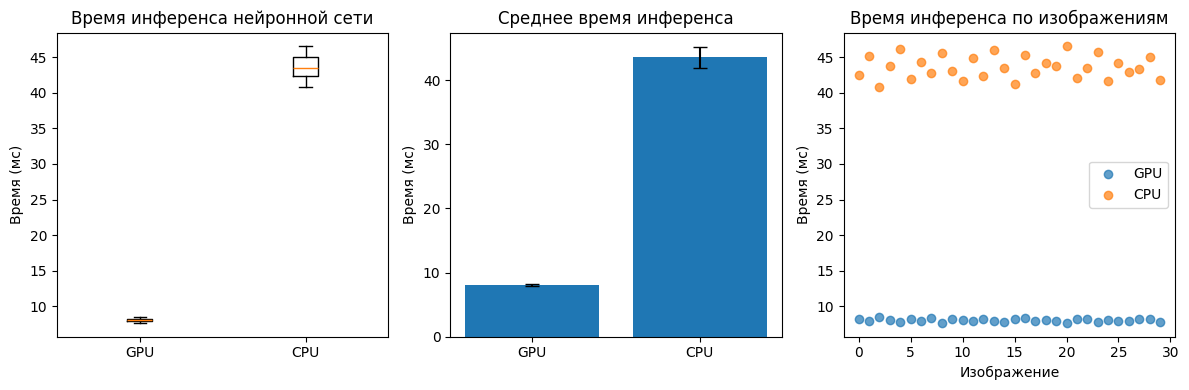


Размер эффекта (Коэн d): 31.0740
Очень большой размер эффекта

GPU быстрее CPU на 35.5 мс
Относительное ускорение: 81.5%


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

gpu_inference_ms = [8.2, 7.9, 8.5, 8.1, 7.8, 8.3, 8.0, 8.4, 7.7, 8.2, 8.1, 7.9, 8.3, 8.0, 7.8, 8.2, 8.4, 7.9, 8.1, 8.0, 7.7, 8.3, 8.2, 7.8, 8.1, 8.0, 7.9, 8.2, 8.3, 7.8]
cpu_inference_ms = [42.5, 45.1, 40.8, 43.7, 46.2, 41.9, 44.3, 42.8, 45.6, 43.1, 41.7, 44.9, 42.3, 46.0, 43.5, 41.2, 45.3, 42.7, 44.1, 43.8, 46.5, 42.0, 43.4, 45.7, 41.6, 44.2, 42.9, 43.3, 45.0, 41.8]

gpu = np.array(gpu_inference_ms)
cpu = np.array(cpu_inference_ms)

alpha = 0.05

print("=== ОСНОВНЫЕ СТАТИСТИКИ ===")
print(f"GPU (n={len(gpu)}):")
print(f"  Среднее время: {np.mean(gpu):.2f} мс")
print(f"  Стандартное отклонение: {np.std(gpu, ddof=1):.2f} мс")

print(f"CPU (n={len(cpu)}):")
print(f"  Среднее время: {np.mean(cpu):.2f} мс")
print(f"  Стандартное отклонение: {np.std(cpu, ddof=1):.2f} мс")

_, p_gpu = stats.shapiro(gpu)
_, p_cpu = stats.shapiro(cpu)

print(f"\n=== ПРОВЕРКА НОРМАЛЬНОСТИ ===")
print(f"GPU: p-value = {p_gpu:.4f}")
print(f"CPU: p-value = {p_cpu:.4f}")

levene_stat, levene_p = stats.levene(gpu, cpu)
print(f"Тест Левена на равенство дисперсий: p-value = {levene_p:.4f}")

t_stat, p_value = stats.ttest_ind(gpu, cpu, equal_var=levene_p > 0.05)

print("\n=== НЕЗАВИСИМЫЙ T-ТЕСТ ===")
print("H₀: Среднее время GPU = Среднее время CPU")
print("H₁: Среднее время GPU < Среднее время CPU")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value (двусторонний): {p_value:.6f}")

p_value_one_tailed = p_value / 2

print(f"p-value (односторонний): {p_value_one_tailed:.10f}")

if p_value_one_tailed < alpha:
    print("РЕЗУЛЬТАТ: Отвергаем нулевую гипотезу")
    print("ВЫВОД: Среднее время инференса на GPU ЗНАЧИТЕЛЬНО МЕНЬШЕ, чем на CPU")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем нулевую гипотезу")
    print("ВЫВОД: Нет статистически значимого различия во времени инференса")

mean_diff = np.mean(gpu) - np.mean(cpu)
print(f"\nРазница средних: {mean_diff:.2f} мс (GPU - CPU)")

speedup = np.mean(cpu) / np.mean(gpu)
print(f"Ускорение на GPU: в {speedup:.1f} раз")

n1, n2 = len(gpu), len(cpu)
std1, std2 = np.std(gpu, ddof=1), np.std(cpu, ddof=1)
se_diff = np.sqrt(std1**2/n1 + std2**2/n2)
df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))

t_critical = stats.t.ppf(0.975, df)
ci_low = mean_diff - t_critical * se_diff
ci_high = mean_diff + t_critical * se_diff

print(f"95% доверительный интервал для разницы: ({ci_low:.2f}, {ci_high:.2f}) мс")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot([gpu, cpu], labels=['GPU', 'CPU'])
plt.title('Время инференса нейронной сети')
plt.ylabel('Время (мс)')

plt.subplot(1, 3, 2)
plt.bar(['GPU', 'CPU'], [np.mean(gpu), np.mean(cpu)], 
        yerr=[np.std(gpu, ddof=1), np.std(cpu, ddof=1)], capsize=5)
plt.title('Среднее время инференса')
plt.ylabel('Время (мс)')

plt.subplot(1, 3, 3)
plt.scatter(range(len(gpu)), gpu, alpha=0.7, label='GPU')
plt.scatter(range(len(cpu)), cpu, alpha=0.7, label='CPU')
plt.xlabel('Изображение')
plt.ylabel('Время (мс)')
plt.title('Время инференса по изображениям')
plt.legend()

plt.tight_layout()
plt.show()

effect_size = abs(mean_diff) / np.sqrt((std1**2 + std2**2)/2)
print(f"\nРазмер эффекта (Коэн d): {effect_size:.4f}")

if effect_size < 0.2:
    print("Маленький размер эффекта")
elif effect_size < 0.5:
    print("Средний размер эффекта")
elif effect_size < 0.8:
    print("Большой размер эффекта")
else:
    print("Очень большой размер эффекта")

print(f"\nGPU быстрее CPU на {abs(mean_diff):.1f} мс")
print(f"Относительное ускорение: {((np.mean(cpu) - np.mean(gpu)) / np.mean(cpu)) * 100:.1f}%")